In [38]:
# %load_ext autoreload
%reload_ext autoreload
%autoreload 2
import numpy as np

from src.GridWorldMDP.objectworld_utils import draw_path, generate_demonstrations, init_object_world, visitation_frequency
from src.deepmaxent_irl_objectworld import run_deepmaxent_irl
from src.maxent_irl_objectworld import run_maxent_irl
from src.img_utils import Visualizer, get_evd, draw_evd
from src.argument_parser import get_parser, parse_args_str

PARSER = get_parser()

In [18]:
np.random.seed(1)
BASIC_ARGS = """
--exp_name test
--height 6
--n_objects 50
--n_colours 6
--height 16
--width 16
--seed 2
"""
args = parse_args_str(PARSER, BASIC_ARGS)
print(args.exp_name)

init_start_pos = np.random.randint(0, args.height, size=(args.n_query, 2)).tolist()
print('start positions: ', init_start_pos)

ow, P_a, rewards_gt, values_gt, policy_gt, feat_map = init_object_world(args)
ow.grid

test
start positions:  [[5, 11]]
[INFO] Initialize Object World
[INFO] Getting ground truth values and policy via value iteration


array([[-1., -1., -1.,  0.,  0.,  0.,  0.,  0.,  0., -1., -1., -1., -1.,
        -1., -1., -1.],
       [-1., -1., -1., -1.,  0.,  0.,  0.,  0., -1., -1., -1., -1., -1.,
        -1., -1., -1.],
       [-1., -1., -1., -1., -1.,  0.,  0., -1.,  0., -1., -1., -1., -1.,
        -1., -1., -1.],
       [-1., -1., -1., -1., -1., -1., -1., -1., -1.,  0., -1., -1., -1.,
        -1., -1., -1.],
       [-1., -1., -1., -1., -1., -1., -1., -1.,  1.,  1.,  1., -1., -1.,
        -1., -1.,  0.],
       [-1., -1., -1., -1., -1., -1., -1.,  1.,  1.,  1.,  1.,  1., -1.,
        -1.,  0.,  0.],
       [-1., -1., -1., -1., -1., -1., -1., -1.,  1.,  1.,  1., -1., -1.,
        -1.,  0.,  0.],
       [-1., -1.,  1., -1., -1., -1., -1., -1., -1.,  1., -1., -1., -1.,
         0.,  0.,  0.],
       [-1.,  1.,  1.,  0., -1., -1., -1., -1.,  0., -1., -1., -1.,  0.,
         0.,  0.,  0.],
       [ 1.,  1.,  1.,  1.,  1., -1., -1., -1., -1., -1., -1.,  1.,  0.,
         0.,  1.,  0.],
       [-1.,  1.,  1.,  1., -1

In [21]:
P_a.shape

(256, 256, 5)

In [ ]:
for s in range(ow.n_states):
    s_coor = ow.idx2pos(s)
    acts = ow.get_actions(s_coor)
    print(f'actions at state {s}: {acts}')

## Maxent

In [ ]:
MAXENT_ARGS = """
--exp_name maxent_rand
--type object
--n_objects 7
--n_colours 4
--height 32
--width 32
--gamma 0.8
--act_random 0.3
--n_trajs 5
--l_traj 6
--learning_rate 0.1
--n_iters 10
--alpha 0.1
--n_query 1
--r_max 1
--error 0.01
--grad_clip 0.5
--weight_decay 0.5
--active
--seed 2
"""
args = parse_args_str(PARSER, MAXENT_ARGS)
print(args.exp_name)

history_maxent_active = run_maxent_irl(args, init_start_pos=init_start_pos)

In [ ]:
visualizer = Visualizer(history_maxent_active, file_path=None)
search_idx = 9
visualizer.draw_value_maps(search_idx)
visualizer.draw_acq_maps(search_idx)

---

## Deep Maxent

In [17]:
DEEP_MAXENT_ACTIVE_ARGS = """
--exp_name deepmaxent_active
--type object
--n_objects 8
--n_colours 2
--height 6
--width 6
--gamma 0.9
--act_random 0.3
--n_trajs 10
--l_traj 8
--learning_rate 0.05
--n_iters 20
--alpha 0.1
--n_query 1
--r_max 1
--error 0.01
--grad_clip 0.5
--weight_decay 0.5
--hiddens 3 3
--device cuda
--active
--seed 2
--verbose 2
"""

[0, 2, 4]

In [32]:
DEEP_MAXENT_ACTIVE_ARGS = """
--exp_name deepmaxent_active
--type object
--n_objects 50
--n_colours 6
--height 16
--width 16
--gamma 0.9
--act_random 0.3
--n_trajs 10
--l_traj 8
--learning_rate 0.05
--n_iters 20
--alpha 0.1
--n_query 1
--r_max 1
--error 0.01
--grad_clip 0.5
--weight_decay 5.0
--hiddens 8 8
--device cuda
--active
--seed 2
--verbose 2
"""

# becareful of learning rate will cause nan
args = parse_args_str(PARSER, DEEP_MAXENT_ACTIVE_ARGS)
print(args.exp_name)
history_deepmaxent_active = run_deepmaxent_irl(args, init_start_pos=init_start_pos)

deepmaxent_active
[INFO] Initialize Object World
[INFO] Getting ground truth values and policy via value iteration
[INFO] Initialize trajectories
Visitation Frequency
[[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 3 3 1 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]]
[INFO - n_trajs:1] Training Deep MaxEnt IRL


  0%|          | 0/20 [00:00<?, ?it/s]

[[-45.4001 -42.2803 -38.9255 -35.7302 -32.7459 -29.7419 -26.5692 -21.6722
  -17.6069 -15.2697 -13.2113 -15.1322 -17.5944 -20.3964 -22.8736 -26.0052]
 [-41.7304 -39.5589 -36.8394 -33.6874 -30.6121 -27.7454 -25.2258 -19.6679
  -13.5666 -12.4276 -11.4987 -11.892  -15.2074 -17.5313 -20.3004 -23.3374]
 [-38.5655 -36.0375 -34.7229 -32.4119 -29.3153 -26.5536 -24.06   -19.6743
  -14.5348 -11.7114 -10.7324 -10.8927 -14.5403 -16.664  -19.2033 -22.9128]
 [-35.6229 -34.0153 -33.0665 -31.237  -28.8529 -26.2632 -23.0868 -18.9364
  -14.6877 -10.121   -9.3034  -9.8842 -14.1226 -16.2476 -19.5342 -23.0876]
 [-33.0276 -31.4529 -30.6961 -30.1139 -28.6033 -26.1129 -22.9805 -18.8264
  -14.5048  -8.8205  -3.7682  -5.264  -10.1479 -16.1249 -20.5345 -23.907 ]
 [-29.4836 -28.3191 -27.8508 -27.5524 -26.6653 -25.2298 -22.985  -19.5993
  -14.5884  -6.7407   2.0776  -0.9939  -4.2643 -13.161  -19.5645 -24.5228]
 [-25.2255 -23.9    -23.4383 -23.1767 -22.5907 -23.1454 -22.7869 -20.312
  -15.3012  -8.7619  -2.5481  -1.

  0%|          | 0/20 [00:00<?, ?it/s]

[[-7.4716 -7.0547 -6.5096 -5.9238 -5.3247 -4.7923 -4.3234 -3.5308 -3.084
  -3.0276 -3.1281 -3.2366 -3.4352 -3.971  -4.4498 -4.9475]
 [-6.9036 -6.731  -6.3564 -5.7856 -5.1678 -4.6207 -4.2494 -3.156  -2.218
  -2.3084 -2.4351 -2.4927 -2.9198 -3.5605 -4.1077 -4.6633]
 [-6.399  -6.2024 -6.1267 -5.7706 -5.1487 -4.7713 -4.4218 -3.383  -2.1326
  -1.7612 -1.9832 -2.2919 -3.088  -3.6062 -3.9326 -4.5356]
 [-5.9647 -5.9122 -5.9685 -5.6981 -5.3899 -5.0961 -4.538  -3.5409 -2.3215
  -1.189  -1.5514 -2.2859 -2.917  -3.411  -3.9679 -4.5093]
 [-5.5617 -5.5523 -5.5884 -5.7478 -5.6734 -5.3655 -4.8096 -3.8197 -2.4562
  -0.4441  0.4617 -0.4726 -2.0534 -3.2302 -4.0582 -4.5577]
 [-4.9258 -5.0664 -5.1522 -5.3327 -5.4284 -5.2213 -4.9342 -4.2978 -2.604
  -0.0283  1.9167  0.7129 -1.0726 -2.6248 -3.6208 -4.401 ]
 [-3.9929 -4.0265 -4.1108 -4.3491 -4.3163 -4.5706 -4.7838 -4.2437 -2.7778
  -1.2065 -0.1914  0.3234 -1.4194 -2.5363 -3.4212 -3.8375]
 [-2.9332 -2.9843 -3.279  -3.281  -3.1313 -3.4949 -3.9117 -3.9749 -3.164

  0%|          | 0/20 [00:00<?, ?it/s]

[[-11.7219 -10.999   -9.9901  -8.9862  -7.9933  -7.006   -6.0217  -4.8021
   -4.      -3.8263  -3.9554  -4.3281  -4.6765  -5.729   -6.9062  -8.0932]
 [-10.6636 -10.397   -9.6281  -8.6166  -7.5689  -6.5648  -5.7501  -4.1792
   -3.012   -3.1012  -3.3373  -3.5479  -4.      -4.9315  -6.315   -7.6789]
 [ -9.6716  -9.456   -9.1179  -8.4218  -7.3651  -6.4753  -5.6224  -4.1587
   -2.8874  -2.8439  -3.0404  -3.2117  -3.8473  -5.0585  -5.9422  -7.1676]
 [ -8.7738  -8.6863  -8.8122  -8.0655  -7.4884  -6.6716  -5.5258  -4.0152
   -2.6999  -2.111   -2.7313  -3.2548  -3.933   -5.1505  -5.9821  -6.8504]
 [ -7.9193  -7.866   -7.99    -8.0841  -7.5516  -6.776   -5.6498  -4.0601
   -2.4247  -1.3453  -1.0086  -2.1291  -3.6627  -4.7762  -5.9211  -6.8438]
 [ -6.8126  -6.885   -7.1647  -7.5393  -7.3109  -6.362   -5.5627  -4.4001
   -2.3217  -0.3734   0.7971  -0.9271  -2.6721  -4.0575  -5.3503  -6.6238]
 [ -5.4595  -5.4611  -5.6456  -5.9147  -5.7457  -5.5094  -5.3342  -4.539
   -2.8006  -1.4411  -0.776   -1.

  0%|          | 0/20 [00:00<?, ?it/s]

[[-5.6294 -5.3736 -4.9137 -4.3329 -3.6029 -2.6194 -1.2428 -0.1489 -0.2865
  -1.3747 -2.583  -3.0636 -3.1905 -3.6221 -4.0774 -4.4045]
 [-5.3995 -5.4059 -5.0435 -4.4127 -3.6334 -2.6757 -1.6333  0.1749  1.0721
  -0.259  -1.8855 -2.7833 -2.9418 -3.4345 -3.9284 -4.3425]
 [-5.1106 -5.2166 -4.9894 -4.4971 -3.7011 -3.0337 -2.1592 -0.613   1.3397
   0.8909 -0.6488 -1.7399 -2.9551 -3.5764 -3.642  -3.9162]
 [-4.7755 -4.7425 -4.6386 -4.3327 -3.9639 -3.482  -2.7247 -1.53    0.5598
   2.0507  1.0909 -0.3277 -2.1966 -2.7336 -3.2129 -3.4208]
 [-4.3713 -4.3218 -4.1337 -4.1366 -4.1121 -3.8088 -3.2971 -2.3862 -0.4073
   1.7861  2.1522  1.0697 -0.5304 -2.1033 -2.611  -2.935 ]
 [-4.0208 -3.9794 -3.7601 -3.7621 -3.9486 -3.8262 -3.5529 -3.1434 -1.2441
   1.2485  2.7736  2.1014  1.547  -0.053  -1.4309 -2.1932]
 [-3.6079 -3.3556 -2.865  -2.6703 -2.9001 -3.2146 -3.4084 -2.9483 -1.2146
   0.6965  1.7386  2.2564  1.3626  0.4815 -0.6579 -1.1881]
 [-3.1822 -2.5808 -1.6106 -0.6474 -1.2397 -2.0095 -2.1984 -2.3395 -1.

  0%|          | 0/20 [00:00<?, ?it/s]

[[-6.1271 -5.927  -5.0251 -3.3762 -0.8027  2.103   3.6427  3.8034  2.9837
   0.6289 -3.4453 -5.4272 -6.0067 -7.1339 -7.8512 -8.0941]
 [-6.2142 -6.5977 -5.9492 -4.2675 -1.713   1.4815  2.9267  3.6888  3.6481
   1.6498 -2.7545 -5.8273 -6.2077 -7.2764 -7.8283 -8.2529]
 [-5.9527 -6.8602 -6.1381 -4.8124 -2.3758 -0.1204  2.0018  2.943   3.7311
   2.8546 -0.4849 -3.7558 -6.5458 -7.5528 -7.072  -6.849 ]
 [-5.1602 -5.4586 -5.1811 -4.5076 -3.6157 -1.9381  0.2232  1.6898  2.9408
   3.6694  2.4473 -0.9656 -4.3996 -5.6758 -5.6609 -4.7868]
 [-3.9411 -4.1092 -3.7157 -4.1557 -4.4236 -3.2336 -1.8077 -0.3463  1.8282
   2.9418  2.7833  1.5286 -1.3812 -2.9689 -2.9958 -2.0254]
 [-3.4452 -3.2922 -2.8562 -3.2986 -4.822  -3.9011 -2.7653 -2.2908  0.6058
   1.9456  2.7036  2.3164  2.2157  1.6016  1.4584  1.6923]
 [-3.3954 -2.6911 -1.0501 -0.6453 -1.9085 -2.7131 -2.4727 -1.2563  0.9877
   1.7163  1.7114  2.5607  2.6516  3.2258  3.2121  3.2441]
 [-3.6619 -1.7884  1.3283  2.407   1.4386 -0.1276  0.1032  0.6506  1.

  0%|          | 0/20 [00:00<?, ?it/s]

[[-0.5245 -0.5168 -0.3822 -0.1296  0.1806  0.439   0.568   0.5651  0.4705
   0.2258 -0.2539 -0.6047 -0.7018 -0.885  -0.9348 -0.8659]
 [-0.6706 -0.793  -0.6549 -0.3511  0.0126  0.3496  0.4743  0.5471  0.5428
   0.3074 -0.1819 -0.7328 -0.7716 -0.9588 -0.9472 -0.91  ]
 [-0.7052 -0.9634 -0.7858 -0.4931 -0.1206  0.1348  0.3365  0.4311  0.5548
   0.4403  0.1081 -0.2991 -0.8914 -0.9698 -0.7516 -0.6019]
 [-0.5438 -0.6326 -0.5348 -0.4759 -0.3909 -0.1325  0.0924  0.2235  0.4163
   0.5355  0.3846  0.0994 -0.4622 -0.498  -0.4471 -0.2256]
 [-0.2716 -0.3113 -0.244  -0.4252 -0.609  -0.377  -0.1943 -0.1028  0.1956
   0.428   0.4114  0.2761  0.0708 -0.129  -0.0398  0.123 ]
 [-0.2487 -0.159  -0.1476 -0.3219 -0.6996 -0.5572 -0.3655 -0.4154 -0.0616
   0.1803  0.3441  0.3564  0.4034  0.3528  0.3345  0.384 ]
 [-0.3933 -0.2381  0.015   0.013  -0.2208 -0.3102 -0.2311 -0.134   0.0803
   0.1585  0.1621  0.3716  0.4026  0.466   0.4878  0.4943]
 [-0.5914 -0.2111  0.241   0.3587  0.2037  0.0204  0.0629  0.1514  0.

  0%|          | 0/20 [00:00<?, ?it/s]

[[-6.0767e+00 -5.7822e+00 -5.0542e+00 -3.8900e+00 -2.3822e+00 -5.4900e-01
   1.0186e+00  1.2489e+00  5.5910e-01 -1.0104e+00 -2.8309e+00 -4.0797e+00
  -4.6809e+00 -5.5728e+00 -6.0585e+00 -6.2679e+00]
 [-5.9640e+00 -6.2424e+00 -5.5816e+00 -4.3292e+00 -2.7359e+00 -7.0940e-01
   5.9520e-01  1.4954e+00  1.4128e+00 -1.3670e-01 -2.1478e+00 -4.0833e+00
  -4.5281e+00 -5.5039e+00 -5.7709e+00 -6.0814e+00]
 [-5.5439e+00 -6.2180e+00 -5.6929e+00 -4.5628e+00 -2.9720e+00 -1.5228e+00
  -5.2200e-02  9.8320e-01  1.8192e+00  1.0462e+00 -5.8750e-01 -2.2569e+00
  -4.6087e+00 -5.2279e+00 -4.9190e+00 -4.8901e+00]
 [-4.4915e+00 -4.8006e+00 -4.6415e+00 -4.3877e+00 -3.8726e+00 -2.4655e+00
  -9.9540e-01  9.8000e-02  1.2197e+00  1.7578e+00  9.8570e-01 -3.7630e-01
  -3.0323e+00 -3.5104e+00 -3.7633e+00 -3.3659e+00]
 [-2.9496e+00 -3.1200e+00 -3.1286e+00 -4.0820e+00 -4.6504e+00 -3.3297e+00
  -2.0390e+00 -1.1284e+00  2.6130e-01  1.1333e+00  9.4630e-01  1.4800e-01
  -8.9280e-01 -2.0985e+00 -2.1017e+00 -1.6998e+00]
 [-2.

  0%|          | 0/20 [00:00<?, ?it/s]

[[-3.3747 -3.4006 -2.9637 -2.0261 -0.5986  1.0574  2.2182  1.7598  0.7535
  -0.9306 -2.7186 -3.5341 -3.8047 -4.4449 -4.7444 -4.6872]
 [-3.4686 -3.9744 -3.5401 -2.5254 -1.0473  0.9108  1.9534  2.0873  1.3536
  -0.1189 -2.0342 -3.5992 -3.6492 -4.5803 -4.6319 -4.6984]
 [-3.2051 -4.1357 -3.7117 -2.7114 -1.224   0.1769  1.4473  1.8219  2.1943
   1.2505 -0.255  -1.743  -3.5867 -4.2444 -3.8127 -3.4379]
 [-2.3162 -2.8144 -2.8    -2.4918 -2.0247 -0.5941  0.6176  1.0604  1.6951
   2.1298  1.4154  0.2673 -2.0406 -2.3091 -2.4222 -1.6783]
 [-0.7229 -1.1349 -1.225  -2.1979 -2.7086 -1.3686 -0.2263  0.1051  0.8878
   1.5129  1.0143  0.2836 -0.1686 -0.9137 -0.3923  0.4115]
 [-0.2389  0.1658 -0.3143 -1.7737 -2.9942 -2.014  -0.7388 -0.837   0.2267
   0.4651 -0.1402 -0.0645  0.6638  1.1942  1.5109  1.9957]
 [-0.8283 -0.2917  0.5247  0.0841 -1.2852 -1.1685 -0.0452  0.4037  0.9068
   0.5078 -0.6569 -0.2961  0.7786  1.9161  2.6031  2.7209]
 [-1.6637 -0.2717  1.6107  2.018   0.7343  0.0428  0.5795  1.1096  1.

  0%|          | 0/20 [00:00<?, ?it/s]

[[-2.7198 -2.5901 -2.3349 -1.9681 -1.4584 -0.7888 -0.0618  0.0039 -0.2964
  -0.8521 -1.4126 -1.5885 -1.5797 -1.6764 -1.7833 -1.8729]
 [-2.6107 -2.6418 -2.4357 -2.051  -1.5303 -0.8076 -0.1824  0.2653  0.1842
  -0.4812 -1.1377 -1.5128 -1.4353 -1.57   -1.6808 -1.8041]
 [-2.4368 -2.5539 -2.3987 -2.0798 -1.5652 -1.0524 -0.4273  0.0706  0.5757
   0.0578 -0.5777 -0.9654 -1.3883 -1.5136 -1.5315 -1.5906]
 [-2.137  -2.1496 -2.0705 -1.94   -1.7484 -1.3212 -0.8027 -0.3548  0.2587
   0.6662  0.0704 -0.3838 -1.0688 -1.1351 -1.2849 -1.2554]
 [-1.7002 -1.6855 -1.5994 -1.7373 -1.8362 -1.5206 -1.1681 -0.8343 -0.1849
   0.396   0.1732 -0.2988 -0.5303 -0.9047 -0.9024 -0.84  ]
 [-1.46   -1.2951 -1.2547 -1.4966 -1.7633 -1.6109 -1.3462 -1.2935 -0.5326
   0.0613 -0.1364 -0.1891 -0.1697 -0.2161 -0.3088 -0.3294]
 [-1.4266 -1.1545 -0.7582 -0.7866 -1.2109 -1.3092 -1.153  -0.9367 -0.3107
  -0.0947 -0.3205 -0.1534 -0.1171  0.1175  0.2695  0.1441]
 [-1.4786 -0.9251 -0.0238  0.4089 -0.3771 -0.8164 -0.7828 -0.6564 -0.

  0%|          | 0/20 [00:00<?, ?it/s]

[[-0.4177 -0.4063 -0.3559 -0.2478 -0.0453  0.3163  0.7096  0.6812  0.4376
   0.0604 -0.1803 -0.2716 -0.2865 -0.3224 -0.3393 -0.3459]
 [-0.4112 -0.413  -0.3817 -0.2744 -0.0684  0.3128  0.6683  0.8037  0.7157
   0.2153 -0.1319 -0.2828 -0.2744 -0.3179 -0.3304 -0.3326]
 [-0.3883 -0.4112 -0.3624 -0.2827 -0.0769  0.1964  0.5652  0.7222  0.8303
   0.454   0.0161 -0.1658 -0.2788 -0.3321 -0.3136 -0.3008]
 [-0.3149 -0.3175 -0.2737 -0.2161 -0.1344  0.0738  0.3519  0.5063  0.6716
   0.714   0.2688 -0.0263 -0.1903 -0.2469 -0.2607 -0.2306]
 [-0.1602 -0.1427 -0.079  -0.1197 -0.1433 -0.0129  0.1388  0.2526  0.4767
   0.617   0.3909  0.134  -0.0333 -0.1447 -0.1493 -0.0668]
 [-0.0686  0.0387  0.13    0.0314 -0.1395 -0.0691  0.0368  0.0209  0.3744
   0.6216  0.3349  0.2387  0.1565  0.1175  0.1626  0.245 ]
 [-0.0769  0.0992  0.4018  0.4443  0.1061 -0.0358  0.0548  0.1469  0.4149
   0.4531  0.2939  0.3725  0.2849  0.4091  0.5758  0.5723]
 [-0.1155  0.2071  0.7519  0.9606  0.4721  0.112   0.0916  0.2076  0.

In [39]:
visualizer = Visualizer(history_deepmaxent_active, file_path=None)
search_idx = 9
visualizer.draw_value_maps(search_idx)
visualizer.draw_acq_maps(search_idx)

KeyError: 'gw'

## Random

In [5]:
DEEP_MAXENT_RANDOM_ARGS = """
--exp_name deepmaxent_random
--type object
--n_objects 7
--n_colours 2
--height 6
--width 6
--gamma 0.9
--act_random 0.3
--n_trajs 10
--l_traj 8
--learning_rate 0.05
--n_iters 20
--alpha 0.1
--n_query 1
--r_max 1
--error 0.01
--grad_clip 0.5
--weight_decay 0.5
--hiddens 3 3
--device cuda
--seed 2
--verbose 2
"""

# becareful of learning rate will cause nan
args = parse_args_str(PARSER, DEEP_MAXENT_RANDOM_ARGS)
print(args.exp_name)
history_deepmaxent_random = run_deepmaxent_irl(args, init_start_pos=init_start_pos)

deepmaxent_random
[INFO] Initialize Object World
[INFO] Getting ground truth values and policy via value iteration
[INFO] Initialize trajectories
Visitation Frequency
[[0 0 0 0 0 0]
 [0 0 0 0 0 0]
 [0 0 0 0 0 0]
 [0 0 0 0 0 0]
 [0 0 0 0 0 0]
 [0 0 0 4 3 1]]
[INFO - n_trajs:1] Training Deep MaxEnt IRL


  0%|          | 0/20 [00:00<?, ?it/s]

--Unnormed Reward Map (Recovered) when n_trajs:1--
[[-2.5645 -2.6361 -1.5133 -1.7306 -1.0612 -0.0529]
 [-4.498  -4.5983 -2.95   -3.6512 -2.708  -0.561 ]
 [-5.4557 -7.0473 -3.2224 -5.3777 -3.9215 -0.2309]
 [-4.3322 -4.484  -2.708  -1.4461 -0.1538  0.1085]
 [-5.4548 -4.0619 -3.5752 -0.2309  0.2024  0.031 ]
 [-8.2026 -4.7878 -4.1393 -0.2771  0.2571  0.1338]]
[INFO - n_trajs:1] Policy evaluation
-- evd = 3.370724 ---
[INFO - n_trajs:1] Generating a new demonstrations from Random Points
Visitation Frequency
[[0 0 0 0 0 0]
 [0 0 0 0 0 0]
 [0 0 0 0 1 5]
 [0 0 0 0 0 2]
 [0 0 0 0 0 0]
 [0 0 0 4 3 1]]
[INFO - n_trajs:2] Training Deep MaxEnt IRL


  0%|          | 0/20 [00:00<?, ?it/s]

--Unnormed Reward Map (Recovered) when n_trajs:2--
[[-2.8078 -2.6046 -1.1471 -1.1852 -0.3391  0.8533]
 [-4.3335 -4.3165 -2.4863 -2.9075 -1.9056  0.3542]
 [-4.9566 -6.2235 -2.6957 -4.4071 -2.8972  0.7395]
 [-3.7622 -3.6678 -1.9056 -0.6211  0.8595  1.1426]
 [-4.7009 -3.2112 -2.7938  0.7395  1.3106  1.227 ]
 [-7.1233 -3.8094 -3.2755  0.6709  1.3398  1.406 ]]
[INFO - n_trajs:2] Policy evaluation
-- evd = 3.539963 ---
[INFO - n_trajs:2] Generating a new demonstrations from Random Points
Visitation Frequency
[[0 1 3 0 0 0]
 [2 1 1 0 0 0]
 [0 0 0 0 1 5]
 [0 0 0 0 0 2]
 [0 0 0 0 0 0]
 [0 0 0 4 3 1]]
[INFO - n_trajs:3] Training Deep MaxEnt IRL


  0%|          | 0/20 [00:00<?, ?it/s]

--Unnormed Reward Map (Recovered) when n_trajs:3--
[[ 0.2108  0.1668  0.2735  0.2269  0.2963  0.433 ]
 [-0.0605 -0.1581  0.0378 -0.1031  0.0392  0.3092]
 [-0.222  -0.4604 -0.0673 -0.3975 -0.1775  0.2937]
 [-0.0628 -0.1678  0.0392  0.0687  0.2355  0.2587]
 [-0.2329 -0.067   0.0576  0.2937  0.3409  0.2841]
 [-0.5    -0.1927 -0.0265  0.3159  0.3758  0.4567]]
[INFO - n_trajs:3] Policy evaluation
-- evd = 2.784992 ---
[INFO - n_trajs:3] Generating a new demonstrations from Random Points
Visitation Frequency
[[0 1 3 0 0 0]
 [2 1 1 0 0 0]
 [0 0 0 0 1 5]
 [0 0 1 3 1 2]
 [0 0 1 2 0 0]
 [0 0 0 4 3 1]]
[INFO - n_trajs:4] Training Deep MaxEnt IRL


  0%|          | 0/20 [00:00<?, ?it/s]

--Unnormed Reward Map (Recovered) when n_trajs:4--
[[ 0.017  -0.0632  0.3905  0.2758  0.5195  0.8939]
 [-1.0711 -1.2204 -0.3662 -0.8119 -0.3167  0.6195]
 [-1.5823 -2.4211 -0.5995 -1.7866 -1.0425  0.6581]
 [-1.0101 -1.1817 -0.3167  0.187   0.6384  0.7799]
 [-1.5827 -0.9458 -0.7257  0.6581  0.9391  0.9093]
 [-2.8389 -1.3137 -1.0011  0.6642  0.9678  1.1108]]
[INFO - n_trajs:4] Policy evaluation
-- evd = 3.469287 ---
[INFO - n_trajs:4] Generating a new demonstrations from Random Points
Visitation Frequency
[[0 1 3 0 0 0]
 [2 1 1 0 0 0]
 [0 0 0 0 1 5]
 [0 0 1 3 1 2]
 [0 1 1 2 0 0]
 [0 4 3 4 3 1]]
[INFO - n_trajs:5] Training Deep MaxEnt IRL


  0%|          | 0/20 [00:00<?, ?it/s]

--Unnormed Reward Map (Recovered) when n_trajs:5--
[[-0.3133 -0.2032  0.1915  0.2392  0.4163  0.6261]
 [-0.4845 -0.5097 -0.1005 -0.104   0.1797  0.5181]
 [-0.5035 -0.6832 -0.2021 -0.4231  0.0715  0.5473]
 [-0.2172 -0.1748  0.1797  0.1106  0.4591  0.4372]
 [-0.364   0.0392  0.3705  0.5473  0.4972  0.3629]
 [-0.7002 -0.106   0.2656  0.5813  0.5586  0.594 ]]
[INFO - n_trajs:5] Policy evaluation
-- evd = 2.105808 ---
[INFO - n_trajs:5] Generating a new demonstrations from Random Points
Visitation Frequency
[[1 2 6 0 0 0]
 [2 3 2 0 0 0]
 [0 0 0 0 1 5]
 [0 0 1 3 1 2]
 [0 1 1 2 0 0]
 [0 4 3 4 3 1]]
[INFO - n_trajs:6] Training Deep MaxEnt IRL


  0%|          | 0/20 [00:00<?, ?it/s]

--Unnormed Reward Map (Recovered) when n_trajs:6--
[[-1.2729 -1.1131 -0.5905 -0.4345 -0.1056  0.2418]
 [-1.3693 -1.3544 -0.8511 -0.7552 -0.2706  0.2293]
 [-1.3541 -1.4753 -0.9211 -1.111  -0.2229  0.3699]
 [-1.0304 -0.8798 -0.2706 -0.3388  0.2935  0.2498]
 [-1.1762 -0.5245  0.1716  0.3699  0.2725  0.1226]
 [-1.5023 -0.7563  0.0093  0.3982  0.3297  0.3101]]
[INFO - n_trajs:6] Policy evaluation
-- evd = 1.726218 ---
[INFO - n_trajs:6] Generating a new demonstrations from Random Points
Visitation Frequency
[[1 2 6 1 1 3]
 [2 3 2 1 0 1]
 [0 0 0 1 1 5]
 [0 0 1 3 1 2]
 [0 1 1 2 0 0]
 [0 4 3 4 3 1]]
[INFO - n_trajs:7] Training Deep MaxEnt IRL


  0%|          | 0/20 [00:00<?, ?it/s]

--Unnormed Reward Map (Recovered) when n_trajs:7--
[[ 0.2567  0.3444  0.9638  0.9425  1.2121  1.6365]
 [-0.2557 -0.3286  0.3002  0.1325  0.5964  1.324 ]
 [-0.3702 -0.594   0.0647 -0.402   0.1686  1.3244]
 [ 0.0314 -0.0143  0.5964  0.605   1.1482  1.1301]
 [-0.2606  0.2927  0.6605  1.3244  1.2406  0.9418]
 [-0.6334  0.0293  0.4525  1.3948  1.3763  1.3565]]
[INFO - n_trajs:7] Policy evaluation
-- evd = 2.365102 ---
[INFO - n_trajs:7] Generating a new demonstrations from Random Points
Visitation Frequency
[[1 2 6 1 1 3]
 [2 3 2 1 0 1]
 [0 0 0 1 1 5]
 [0 0 1 3 1 2]
 [0 1 1 5 2 0]
 [0 4 3 6 4 1]]
[INFO - n_trajs:8] Training Deep MaxEnt IRL


  0%|          | 0/20 [00:00<?, ?it/s]

--Unnormed Reward Map (Recovered) when n_trajs:8--
[[ 0.7672  0.8327  1.6965  1.5935  1.9521  2.5561]
 [-0.3467 -0.6324  0.5806  0.235   0.9687  1.9738]
 [-0.6323 -1.1415  0.0353 -0.8913  0.2763  1.8061]
 [ 0.3065  0.0685  0.9687  0.6494  1.3553  1.105 ]
 [-0.3567  0.6957  1.3544  1.8061  1.1844  0.3789]
 [-1.1656  0.1978  1.0482  1.9826  1.5279  1.2571]]
[INFO - n_trajs:8] Policy evaluation
-- evd = 1.673620 ---
[INFO - n_trajs:8] Generating a new demonstrations from Random Points
Visitation Frequency
[[1 2 6 1 3 3]
 [2 3 2 2 2 1]
 [0 0 0 1 2 5]
 [0 0 1 4 2 2]
 [0 1 1 5 2 0]
 [0 4 3 6 4 1]]
[INFO - n_trajs:9] Training Deep MaxEnt IRL


  0%|          | 0/20 [00:00<?, ?it/s]

--Unnormed Reward Map (Recovered) when n_trajs:9--
[[-2.1245 -1.5738 -0.0124  0.2482  0.8522  1.3164]
 [-2.8797 -2.9708 -0.9976 -0.9026  0.2642  1.1705]
 [-2.935  -4.0324 -1.3736 -2.3277  0.0467  1.2619]
 [-1.4793 -1.1986  0.2642 -0.0924  1.0448  0.7832]
 [-2.1342 -0.2215  0.715   1.2619  0.6826 -0.0488]
 [-4.1871 -0.8579  0.4714  1.3261  0.9258  0.4214]]
[INFO - n_trajs:9] Policy evaluation
-- evd = 1.082439 ---
[INFO - n_trajs:9] Generating a new demonstrations from Random Points
Visitation Frequency
[[1 3 9 1 3 3]
 [2 3 3 2 2 1]
 [0 1 2 1 2 5]
 [0 0 1 4 2 2]
 [0 1 1 5 2 0]
 [0 4 3 6 4 1]]
[INFO - n_trajs:10] Training Deep MaxEnt IRL


  0%|          | 0/20 [00:00<?, ?it/s]

--Unnormed Reward Map (Recovered) when n_trajs:10--
[[-0.2237 -0.1768  0.0421  0.0538  0.1596  0.3045]
 [-0.4153 -0.4377 -0.1433 -0.1749 -0.      0.2437]
 [-0.4758 -0.6211 -0.1993 -0.3916 -0.082   0.2852]
 [-0.2669 -0.2513 -0.      0.0403  0.2618  0.2878]
 [-0.3963 -0.1312  0.0633  0.2852  0.3437  0.3288]
 [-0.6715 -0.2345 -0.0161  0.2944  0.3584  0.4275]]
[INFO - n_trajs:10] Policy evaluation
-- evd = 2.458652 ---


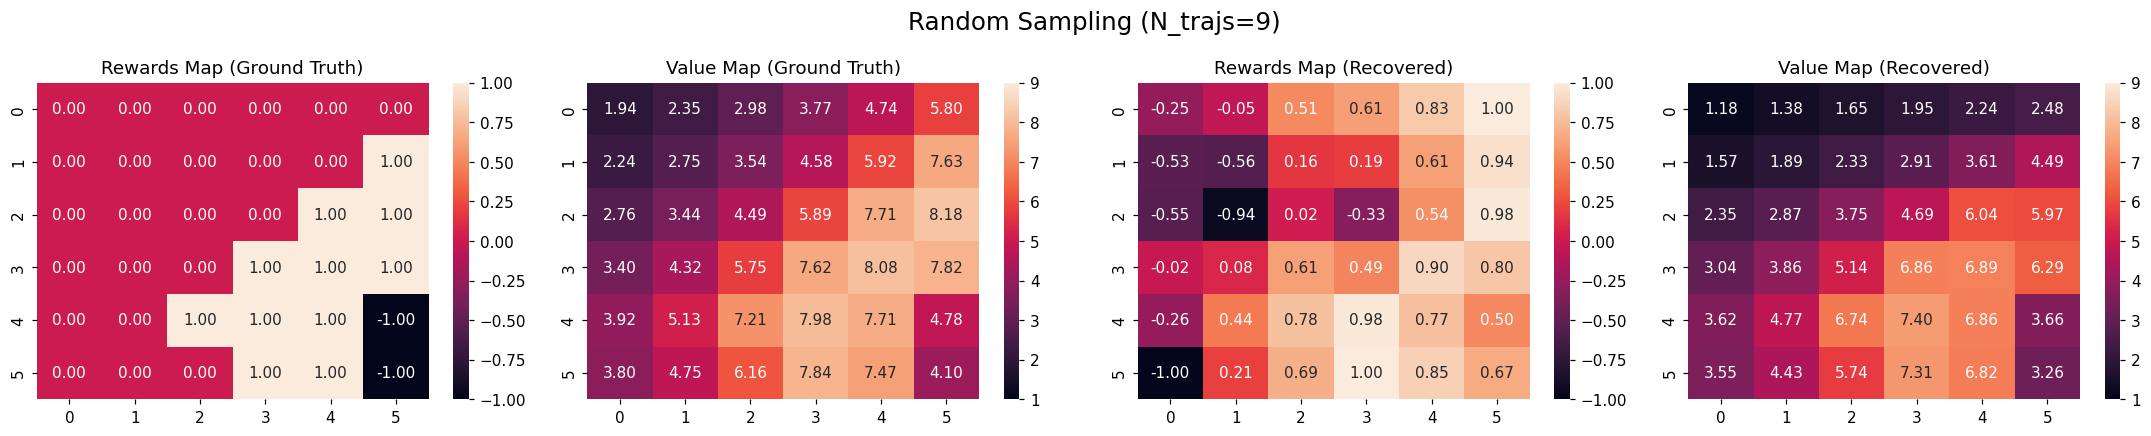

In [6]:
visualizer = Visualizer(history_deepmaxent_random, file_path=None)
search_idx = 9
visualizer.draw_value_maps(search_idx)

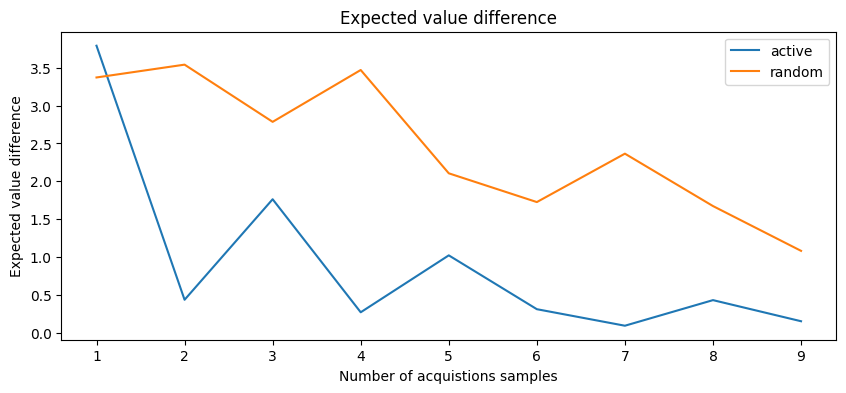

In [7]:
evd_act = get_evd(history_deepmaxent_active)
evd_rand = get_evd(history_deepmaxent_random)
draw_evd(evd_act[None, :], evd_rand[None, :])

In [11]:
from IPython.display import clear_output
from collections import defaultdict
from tqdm.notebook import tqdm

DEEP_MAXENT_ACTIVE_ARGS = """
--exp_name deepmaxent_active
--type object
--n_objects 7
--n_colours 2
--height 6
--width 6
--gamma 0.9
--act_random 0.3
--n_trajs 10
--l_traj 8
--learning_rate 0.05
--n_iters 20
--alpha 0.1
--n_query 1
--r_max 1
--error 0.01
--grad_clip 0.5
--weight_decay 0.5
--hiddens 3 3
--device cuda
--active
--seed none
--verbose 0
"""
DEEP_MAXENT_RANDOM_ARGS = """
--exp_name deepmaxent_random
--type object
--n_objects 7
--n_colours 2
--height 6
--width 6
--gamma 0.9
--act_random 0.3
--n_trajs 10
--l_traj 8
--learning_rate 0.05
--n_iters 20
--alpha 0.1
--n_query 1
--r_max 1
--error 0.01
--grad_clip 0.5
--weight_decay 0.5
--hiddens 3 3
--device cuda
--seed none
--verbose 0
"""

ARG_STRS = [DEEP_MAXENT_ACTIVE_ARGS, DEEP_MAXENT_RANDOM_ARGS]
evd_acts = []
evd_rands = []
n_exp = 100
exp_results = defaultdict(list)
for arg_str in ARG_STRS:
    args = parse_args_str(PARSER, arg_str)
    for _ in tqdm(range(n_exp), total=n_exp, desc=f'Experiment: {args.exp_name}'):
        init_start_pos = np.random.randint(0, args.height, size=(args.n_query, 2)).tolist()
        history = run_deepmaxent_irl(args, init_start_pos=init_start_pos)
        evd = get_evd(history)
        exp_results[args.exp_name].append(evd)

Experiment: deepmaxent_active:   0%|          | 0/100 [00:00<?, ?it/s]

[INFO] Initialize Object World
[INFO] Getting ground truth values and policy via value iteration
[INFO] Initialize trajectories
Visitation Frequency
[[0 0 0 0 0 0]
 [0 0 0 0 0 0]
 [0 0 0 0 0 0]
 [0 0 0 0 0 0]
 [0 0 1 1 0 0]
 [0 0 0 3 2 1]]
[INFO - n_trajs:1] Training Deep MaxEnt IRL
iteration: 0/20 l2 loss = 1.6257
iteration: 1/20 l2 loss = 1.6181
iteration: 2/20 l2 loss = 1.6329
iteration: 3/20 l2 loss = 1.6066
iteration: 4/20 l2 loss = 1.6052
iteration: 5/20 l2 loss = 1.5572
iteration: 6/20 l2 loss = 1.5150
iteration: 7/20 l2 loss = 1.4810
iteration: 8/20 l2 loss = 1.4759
iteration: 9/20 l2 loss = 1.5049
iteration: 10/20 l2 loss = 1.5549
iteration: 11/20 l2 loss = 1.6406
iteration: 12/20 l2 loss = 1.7267
iteration: 13/20 l2 loss = 1.8020
iteration: 14/20 l2 loss = 1.8891
iteration: 15/20 l2 loss = 1.9809
iteration: 16/20 l2 loss = 2.1080
iteration: 17/20 l2 loss = 2.2508
iteration: 18/20 l2 loss = 2.4077
iteration: 19/20 l2 loss = 2.5789
--Unnormed Reward Map (Recovered) when n_trajs

KeyboardInterrupt: 

In [ ]:
        
print(f"\nevd_acts: \n{evd_acts}")
print(f"\nevd_rands: \n{evd_rands}")
evd_acts = np.array(evd_acts)
evd_rands = np.array(evd_rands)
draw_evd(evd_acts, evd_rands)


In [8]:
DEEP_MAXENT_ACTIVE_ARGS

'\n--exp_name deepmaxent_active\n--type object\n--n_objects 7\n--n_colours 2\n--height 6\n--width 6\n--gamma 0.9\n--act_random 0.3\n--n_trajs 10\n--l_traj 8\n--learning_rate 0.05\n--n_iters 20\n--alpha 0.1\n--n_query 1\n--r_max 1\n--error 0.01\n--grad_clip 0.5\n--weight_decay 0.5\n--hiddens 3 3\n--device cuda\n--active\n--seed 2\n--verbose 2\n'